#  Implement KNN from scratch 

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import csv 
import pandas as pd
data=pd.read_csv("../data/iris.data.txt")

In [19]:
data

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


### Visualising different species(Classifiers) on which we are going to work

In [26]:
# rename target 
data=data.rename(columns={"Iris-setosa":"Species", "5.1":"SepalLengthCm", "3.5":"SepalWidththCm", "1.4":"PetalLengthCm", "0.2":"PetalWidthCm"})
data

,SepalLengthCm,SepalWidththCm,PetalLengthCm,PetalWidthCm,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [27]:
Species = list(set(data['Species']))


In [28]:
Species

['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']

In [29]:
Specie1 = data[data['Species']==Species[0]]
Specie2 = data[data['Species']==Species[1]]
Specie3 = data[data['Species']==Species[2]]

In [30]:
Specie1

,SepalLengthCm,SepalWidththCm,PetalLengthCm,PetalWidthCm,Species
99,6.3,3.3,6.0,2.5,Iris-virginica
100,5.8,2.7,5.1,1.9,Iris-virginica
101,7.1,3.0,5.9,2.1,Iris-virginica
102,6.3,2.9,5.6,1.8,Iris-virginica
103,6.5,3.0,5.8,2.2,Iris-virginica
104,7.6,3.0,6.6,2.1,Iris-virginica
105,4.9,2.5,4.5,1.7,Iris-virginica
106,7.3,2.9,6.3,1.8,Iris-virginica
107,6.7,2.5,5.8,1.8,Iris-virginica
108,7.2,3.6,6.1,2.5,Iris-virginica


Text(0.5, 1.0, 'Different Species Visualization')

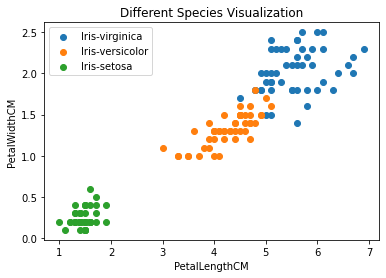

In [36]:
import matplotlib.pyplot as plt
plt.scatter(Specie1['PetalLengthCm'], Specie1['PetalWidthCm'], label=Species[0])
plt.scatter(Specie2['PetalLengthCm'], Specie2['PetalWidthCm'], label=Species[1])
plt.scatter(Specie3['PetalLengthCm'], Specie3['PetalWidthCm'], label=Species[2])
plt.xlabel('PetalLengthCM')
plt.ylabel('PetalWidthCM')
plt.legend()
plt.title('Different Species Visualization')

In [37]:
# Now our task is to predict the new data point belongs to which species based on sepalLength, sepalWidth, petalLength, petalWidth


## Preprocessing Data

In [39]:
data.head()

,SepalLengthCm,SepalWidththCm,PetalLengthCm,PetalWidthCm,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [40]:
data.tail()

,SepalLengthCm,SepalWidththCm,PetalLengthCm,PetalWidthCm,Species
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica
148,5.9,3.0,5.1,1.8,Iris-virginica


In [41]:
# WE SHOULD SHUFFLE OUR DATA TO AVOID OVERFITTING


In [44]:
import numpy as np
shuffle_index = np.random.permutation(data.shape[0])        #shuffling the row index of our dataset
data = data.iloc[shuffle_index]
data.head(5)

,SepalLengthCm,SepalWidththCm,PetalLengthCm,PetalWidthCm,Species
91,5.8,2.6,4.0,1.2,Iris-versicolor
62,6.1,2.9,4.7,1.4,Iris-versicolor
87,5.6,3.0,4.1,1.3,Iris-versicolor
79,5.5,2.4,3.8,1.1,Iris-versicolor
11,4.8,3.0,1.4,0.1,Iris-setosa


In [45]:
# We can see that our data is now shuffled via the index 

In [ ]:
##########################